In [3]:
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report,accuracy_score,average_precision_score,confusion_matrix
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from numpy import set_printoptions
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [4]:
fraud_data = pd.read_csv('Fraud_check.csv')
fraud_data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


# Exploratory Data Analysis

In [5]:
fraud_data.shape

(600, 6)

In [6]:
fraud_data.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

## Data conversion

In [7]:
le = LabelEncoder()
fraud_data['Undergrad'] = le.fit_transform(fraud_data['Undergrad'])
fraud_data['Marital.Status'] = le.fit_transform(fraud_data['Marital.Status'])
fraud_data['Urban'] = le.fit_transform(fraud_data['Urban'])
fraud_data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


In [8]:
list(fraud_data.columns)

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban']

In [9]:
fraud_data.dtypes # Data is converted into numerical form. 

Undergrad          int32
Marital.Status     int32
Taxable.Income     int64
City.Population    int64
Work.Experience    int64
Urban              int32
dtype: object

In [10]:
fraud_data.isna().sum() # No null Values

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [11]:
fraud_data[fraud_data.duplicated()].shape # No Duplicate Values in the Dataset

(0, 6)

## Outlier Detection

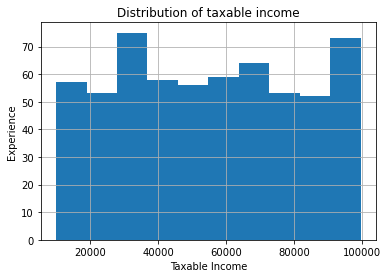

In [12]:
plt.title('Distribution of taxable income')
plt.xlabel('Taxable Income')
plt.ylabel('Experience')
fraud_data['Taxable.Income'].hist()
plt.show()


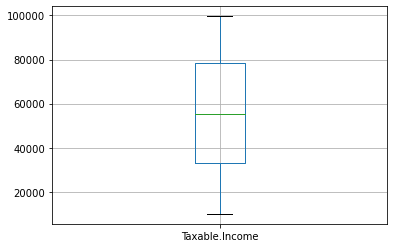

In [13]:
fraud_data.boxplot(column=['Taxable.Income']) # No outliers
plt.show()

In [14]:
fraud_data.describe().round(2) # descriptive statistic for the data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
count,600.00,600.00,600.00,600.00,600.00,600.0
mean,0.52,1.05,55208.38,108747.37,15.56,0.5
std,0.50,0.82,26204.83,49850.08,8.84,0.5
min,0.00,0.00,10003.00,25779.00,0.00,0.0
25%,0.00,0.00,32871.50,66966.75,8.00,0.0
50%,1.00,1.00,55074.50,106493.50,15.00,1.0
75%,1.00,2.00,78611.75,150114.25,24.00,1.0
max,1.00,2.00,99619.00,199778.00,30.00,1.0


## Scatter plot and correlation analysis

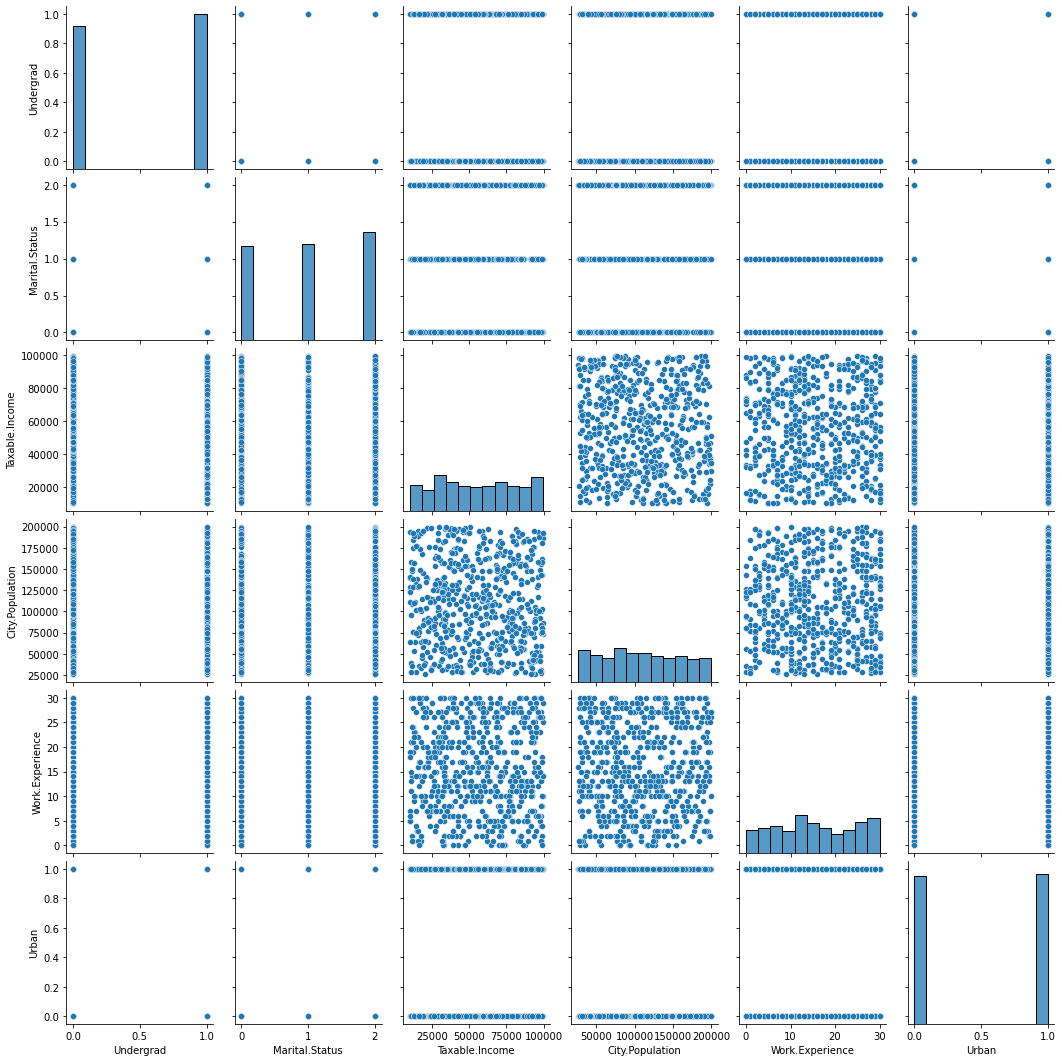

In [15]:
sns.pairplot(fraud_data)
plt.show()

In [75]:
fraud_data.corr().round(2) # correlation between the features

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
Undergrad,1.00,0.04,-0.05,0.08,-0.01,-0.00
Marital.Status,0.04,1.00,-0.01,-0.00,-0.00,0.06
Taxable.Income,-0.05,-0.01,1.00,-0.06,-0.00,0.07
City.Population,0.08,-0.00,-0.06,1.00,0.01,-0.04
Work.Experience,-0.01,-0.00,-0.00,0.01,1.00,-0.09
Urban,-0.00,0.06,0.07,-0.04,-0.09,1.00


<AxesSubplot:>

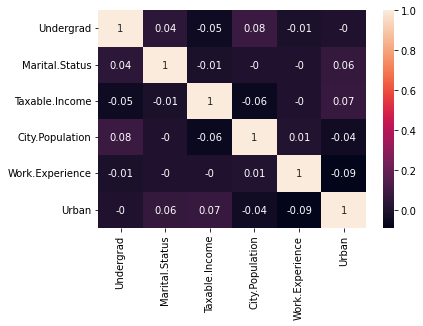

In [76]:
sns.heatmap(fraud_data.corr().round(2),annot = True)

## Transformation of Data

### Creating dummy

In [78]:
fraud_data =pd.get_dummies(fraud_data,columns= ['Undergrad', 'Marital.Status', 'Urban'], drop_first=True)
fraud_data["TaxInc"] = pd.cut(fraud_data["Taxable.Income"],bins = [10002,30000,99620], labels = ["Risky", "Good"])
fraud_data = pd.get_dummies(fraud_data,columns = ["TaxInc"],drop_first=True)
fraud_data.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_1,Marital.Status_1,Marital.Status_2,Urban_1,TaxInc_Good
0,68833,50047,10,0,0,1,1,1
1,33700,134075,18,1,0,0,1,1
2,36925,160205,30,0,1,0,1,1
3,50190,193264,15,1,0,1,1,1
4,81002,27533,28,0,1,0,0,1


### Normalization of Data

In [85]:
list(fraud_data.columns)

['Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Undergrad_1',
 'Marital.Status_1',
 'Marital.Status_2',
 'Urban_1',
 'TaxInc_Good']

In [86]:
min_max = MinMaxScaler()
scaled_data = min_max.fit_transform(fraud_data)
new_data = pd.DataFrame(scaled_data,columns= {'Taxable.Income','City.Population','Work.Experience','Undergrad_1','Marital.Status_1','Marital.Status_2','Urban_1','TaxInc_Good'}).round(2)
new_data

,TaxInc_Good,Work.Experience,City.Population,Marital.Status_2,Undergrad_1,Marital.Status_1,Urban_1,Taxable.Income
0,0.66,0.14,0.33,0.0,0.0,1.0,1.0,1.0
1,0.26,0.62,0.60,1.0,0.0,0.0,1.0,1.0
2,0.30,0.77,1.00,0.0,1.0,0.0,1.0,1.0
3,0.45,0.96,0.50,1.0,0.0,1.0,1.0,1.0
4,0.79,0.01,0.93,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
595,0.74,0.08,0.23,1.0,0.0,0.0,1.0,1.0
596,0.67,0.17,0.07,1.0,0.0,0.0,1.0,1.0
597,0.42,0.74,0.00,0.0,0.0,0.0,1.0,1.0
598,0.99,0.89,0.57,1.0,1.0,0.0,0.0,1.0


## Model Building and Model training

In [87]:
x = new_data.drop('TaxInc_Good',axis = 1)
y = new_data[['TaxInc_Good']]

In [88]:
x.shape,y.shape

((600, 7), (600, 1))

In [90]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=12)

In [91]:
x_train.shape,y_train.shape

((480, 7), (480, 1))

In [92]:
x_test.shape,y_test.shape

((120, 7), (120, 1))

In [94]:
##Converting the Taxable income variable to bucketing. 
new_data["income"]="<=30000"
new_data.loc[fraud_data["Taxable.Income"]>=30000,"income"]="Good"
new_data.loc[fraud_data["Taxable.Income"]<=30000,"income"]="Risky"

In [95]:
##Droping the Taxable income variable
fraud_data.drop(["Taxable.Income"],axis=1,inplace=True)

In [96]:
## As we are getting error as "ValueError: could not convert string to float: 'YES'".
## Model.fit doesnt not consider String. So, we encode
fraud_data.rename(columns={"Undergrad":"undergrad","Marital.Status":"marital","City.Population":"population","Work.Experience":"experience","Urban":"urban"},inplace=True)
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for column_name in fraud_data.columns:
    if fraud_data[column_name].dtype == object:
        fraud_data[column_name] = le.fit_transform(fraud_data[column_name])
    else:
        pass

In [97]:
features = fraud_data.iloc[:,0:5]
labels = fraud_data.iloc[:,5]

In [98]:
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.2,stratify = labels)

# Random Forest Classifier

In [100]:
from sklearn.ensemble import RandomForestClassifier as RF
model = RF(n_jobs = 3,n_estimators = 15, oob_score = True, criterion = "entropy")
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [101]:
model.estimators_
model.classes_
model.n_features_
model.n_classes_

2

In [102]:
model.n_outputs_

1

In [103]:
y_predict_train = model.predict(x_train)
accuracy_score(y_train,y_predict_train)

0.99375

In [105]:
confusion = confusion_matrix(y_train,y_predict_train)
confusion

array([[236,   2],
       [  1, 241]], dtype=int64)

In [106]:
y_pred_test = model.predict(x_test)
accuracy_score(y_test,y_pred_test)

0.49166666666666664

# Decision Tree Classifier

In [108]:
dt_model = DecisionTreeClassifier(criterion = 'gini',max_depth=3)
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

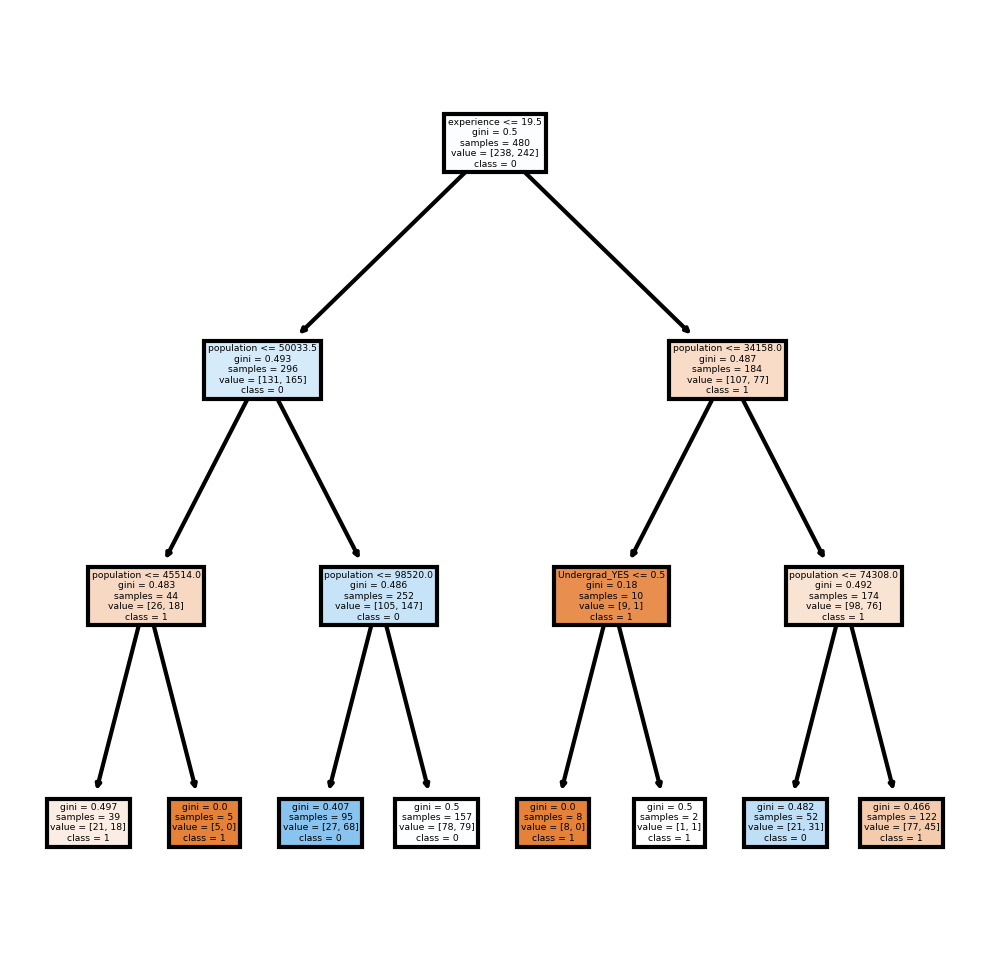

In [111]:
fn=['population','experience','Undergrad_YES','Marital.Status_Married','Marital.Status_Single','Urban_YES']
cn=['1', '0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dt_model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [112]:
#Predicting on test data
preds = dt_model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

1    83
0    37
dtype: int64

In [113]:
pd.crosstab(y_test,preds)

col_0,0,1
Urban_1,,
0,16,44
1,21,39


In [114]:
np.mean(preds==y_test)

0.4583333333333333